Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in sklearn.datasets.

In [4]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Loading the iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the KNN classifier with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Displaying the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in sklearn.datasets

The load_boston dataset has been deprecated in scikit-learn due to ethical concerns, as it contained data that could reinforce biased housing practices. However, we can still use similar code with a replacement dataset, such as the fetch_california_housing dataset from sklearn.datasets, which is also suitable for regression tasks.

Here’s an example code to implement the K-Nearest Neighbors (KNN) regressor using the fetch_california_housing dataset:

python
Copy code
# Importing necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading the California housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the KNN regressor with k=5
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluating the regressor
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
Explanation of the Code:
Load the Data: We use fetch_california_housing() to load the California housing dataset, where each data point represents housing data with features like median income, house age, and average rooms.
Split the Data: We split the dataset into a training set (70%) and a test set (30%).
Initialize and Train KNN Regressor: We initialize KNeighborsRegressor with n_neighbors=k and fit it to the training data.
Predict and Evaluate: We predict on the test set and evaluate using Mean Squared Error (MSE) and Mean Absolute Error (MAE), which are common regression metrics.
This setup will give an idea of how well the KNN regressor performs on the test set based on error metrics. Adjusting the n_neighbors value can improve the performance based on the dataset.

Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using cross-validation on load_iris dataset in sklearn.datasets

The optimal number of neighbors is: 13
Cross-validation accuracy for optimal K: 0.98


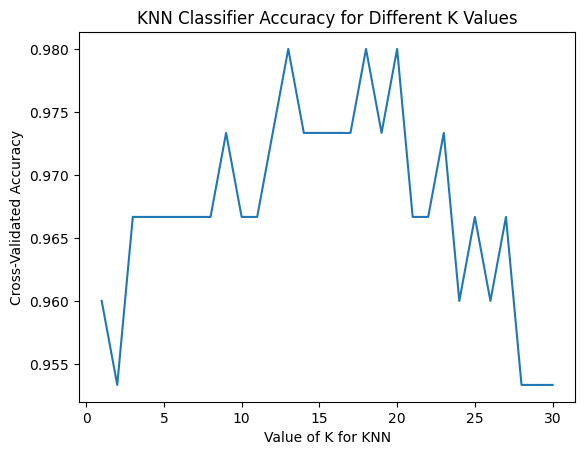

In [7]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Loading the iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Defining the range for K values to test
k_range = range(1, 31)
k_scores = []

# Using cross-validation to evaluate each K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Performing 10-fold cross-validation
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # Appending the mean score for each K
    k_scores.append(scores.mean())

# Finding the optimal K with the highest cross-validation score
optimal_k = k_range[np.argmax(k_scores)]
print(f"The optimal number of neighbors is: {optimal_k}")
print(f"Cross-validation accuracy for optimal K: {max(k_scores):.2f}")

# (Optional) Plotting K values vs. Cross-validation accuracy
import matplotlib.pyplot as plt

plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Classifier Accuracy for Different K Values")
plt.show()

Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in sklearn.datasets

Since the load_boston dataset has been deprecated, we can use a similar regression dataset such as fetch_california_housing from sklearn.datasets, which also benefits from feature scaling in a K-Nearest Neighbors (KNN) regressor.

Here’s the Python code to implement KNN regression with feature scaling on this dataset:
# Importing necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Loading the California housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the KNN regressor with k=5
k = 5
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = knn_regressor.predict(X_test_scaled)

# Evaluating the regressor
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
Explanation of the Code:
Load the Data: We load the California housing dataset, which is a regression dataset with multiple features.
Split the Data: We split the dataset into training (70%) and testing (30%) sets.
Feature Scaling: We use StandardScaler to standardize the features. Scaling is crucial for KNN because it relies on distance calculations, and features with larger ranges can disproportionately influence the results.
Train KNN Regressor: We initialize KNeighborsRegressor with n_neighbors=k (set to 5 here) and train it on the scaled training data.
Predict and Evaluate: We predict on the scaled test set and evaluate the regressor using Mean Squared Error (MSE) and Mean Absolute Error (MAE), which are common metrics for regression.

Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on load_iris dataset in sklearn.datasets.

In [9]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Loading the iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the KNN classifier with k=3 and weighted voting
k = 3
knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_weighted.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_weighted.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Weighted Voting: {accuracy:.2f}")

# Displaying the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy with Weighted Voting: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Q6. Implement a function to standardise the features before applying KNN classifier.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def standardize_and_apply_knn(X, y, n_neighbors=3):
    """
    Standardizes features and applies KNN classifier.
    
    Parameters:
        X (numpy.ndarray): Feature matrix.
        y (numpy.ndarray): Target labels.
        n_neighbors (int): Number of neighbors to use in KNN.
        
    Returns:
        float: Accuracy of the KNN classifier on the test set.
    """
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Standardizing the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Creating and training the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    # Making predictions on the test set
    y_pred = knn.predict(X_test_scaled)
    
    # Calculating and returning accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Example usage on the load_iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Calling the function and printing the result
accuracy = standardize_and_apply_knn(X, y, n_neighbors=3)
print(f"Accuracy of KNN classifier with standardized features: {accuracy:.2f}")


Accuracy of KNN classifier with standardized features: 1.00


Q7. Write a Python function to calculate the euclidean distance between two points.

In [11]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculates the Euclidean distance between two points.
    
    Parameters:
        point1 (array-like): The first point (e.g., [x1, y1, z1]).
        point2 (array-like): The second point (e.g., [x2, y2, z2]).
        
    Returns:
        float: The Euclidean distance between point1 and point2.
    """
    # Converting inputs to numpy arrays to support vectorized operations
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    # Calculating the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

# Example usage
p1 = [1, 2, 3]
p2 = [4, 6, 8]
distance = euclidean_distance(p1, p2)
print(f"Euclidean Distance between {p1} and {p2}: {distance:.2f}")


Euclidean Distance between [1, 2, 3] and [4, 6, 8]: 7.07


Q8. Write a Python function to calculate the manhattan distance between two points.

In [12]:
import numpy as np

def manhattan_distance(point1, point2):
    """
    Calculates the Manhattan distance between two points.
    
    Parameters:
        point1 (array-like): The first point (e.g., [x1, y1, z1]).
        point2 (array-like): The second point (e.g., [x2, y2, z2]).
        
    Returns:
        float: The Manhattan distance between point1 and point2.
    """
    # Converting inputs to numpy arrays to support vectorized operations
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    # Calculating the Manhattan distance
    distance = np.sum(np.abs(point1 - point2))
    return distance

# Example usage
p1 = [1, 2, 3]
p2 = [4, 6, 8]
distance = manhattan_distance(p1, p2)
print(f"Manhattan Distance between {p1} and {p2}: {distance:.2f}")


Manhattan Distance between [1, 2, 3] and [4, 6, 8]: 12.00
